# LUNAR LANDER v2 Solved with a DQN

## Install All Dependencies

In [1]:
%config IPCompleter.use_jedi = False
%matplotlib inline

In [2]:
import gym
import numpy as np

import sys
sys.path.insert(0,'..')
from agents.dqn_agent import DQNAgent, DQNHyperparameters
from train_and_visualize import train_agent, save_random_agent_gif, save_trained_agent_gif, TrainingHyperparameters

## Instantiate all Required Objects

In [3]:
# Instantiate environment
env = gym.make('LunarLander-v2')


# DQN Hyperparameters
hp = DQNHyperparameters()

hp.BUFFER_SIZE = int(1e4)
hp.BATCH_SIZE = 128
hp.TAU = 1e-2


# Instantiate agent
from model import SimpleDQN

agent = DQNAgent(
    state_size=env.observation_space.shape[0], 
    action_size=env.action_space.n, 
    seed=0,
    DQN=SimpleDQN,
    hyperparameters=hp
)

## Visualize the Random Agent

In [4]:
save_random_agent_gif(env)

## Train the Agent

A running average of the return over the last 100 episodes is maintained and plotted at the end. The training ends once the running average crosses 200.

Every episode has an upper limit of 1500 steps (that's quite generous for the LunarLander-v2 environment, actually)

TRAINING HYPERPARAMETERS:

Epsilon (Exploration vs Exploitation):
Starting Epsilon: 1.0
Epsilon Lower Limit: 0.01
Epsilon Decay: 0.995



DQN AGENT HYPERPARAMETERS:

Experience Replay and Reward Calculation:
Experience Replay Memory Size: 10000
Gamma (Reward Calculation Discount): 0.99

DQN Training:
Batch Size: 128
Learning Rate: 0.0005
Perform Optimization Every: 4 steps

Target DQN Update:
Double DQN: False
Hard Update: False
Hard Update Every: 128 steps
Soft Update Rate: 0.01



Episode 100	Average Score: -169.54
Episode 200	Average Score: -40.387
Episode 300	Average Score: 66.001
Episode 400	Average Score: 137.06
Episode 440	Average Score: 200.63
Environment solved in 440 episodes!	Average Score: 200.63


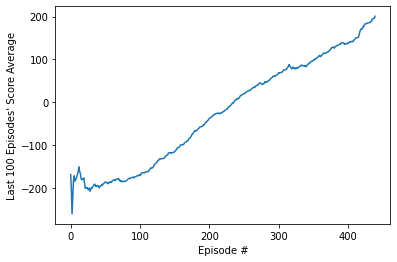

In [5]:
train_agent(   
    env=env,
    agent=agent,
    n_episodes=2000,
    max_t=1500,
    completion_criteria=lambda scores_window: np.mean(scores_window) >= 200.0
)

## Visualize the Trained Agent

In [6]:
save_trained_agent_gif(env, agent)